In [113]:
#importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
#Importando os dados
df = pd.read_csv("/content/cars_train.csv", encoding='utf-16 le', sep='\t')
df_test = pd.read_csv("/content/cars_test.csv", encoding='utf-16 le', sep='\t')

# EDA - Análise Exploratória dos Dados

In [115]:
#Analisando os dados
df.head(5)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.00,67772.00,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59
1,279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.00,62979.00,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33
2,56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.00,44070.00,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81
3,56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.00,85357.00,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.36
4,338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.00,71491.00,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76


In [116]:
#olhando o tamanho do dataframe, se há dados duplicados, nulos e o tipo dos dados
print(df.shape)
print(df.duplicated().sum())

tabela = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'Duplicated':df.duplicated().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Types': df.dtypes.values
})
display(tabela)

(29584, 29)
0


,Unique,Null,Duplicated,NullPercent,Types
id,29584,0,0,0.00,object
num_fotos,14,177,0,0.01,float64
marca,40,0,0,0.00,object
modelo,457,0,0,0.00,object
versao,1916,0,0,0.00,object
ano_de_fabricacao,35,0,0,0.00,int64
ano_modelo,17,0,0,0.00,float64
hodometro,26004,0,0,0.00,float64
cambio,7,0,0,0.00,object
num_portas,3,0,0,0.00,int64


In [117]:
#deixando a coluna preco com apenas duas casas depois da virgula
df['preco'] = df['preco'].apply(lambda x: round(x, 2))

In [118]:
#detalhes sobre o dataframe
df.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
count,29407.00,29584.00,29584.00,29584.00,29584.00,0.00,29584.00
mean,10.32,2016.76,2017.81,58430.59,3.94,NaN,133023.88
std,3.49,4.06,2.67,32561.77,0.34,NaN,81662.87
min,8.00,1985.00,1997.00,100.00,2.00,NaN,9869.95
25%,8.00,2015.00,2016.00,31214.00,4.00,NaN,76571.77
50%,8.00,2018.00,2018.00,57434.00,4.00,NaN,114355.79
75%,14.00,2019.00,2020.00,81953.50,4.00,NaN,163679.62
max,21.00,2022.00,2023.00,390065.00,4.00,NaN,1359812.89


In [119]:
#Verificando as marcas
df['marca'].value_counts()

VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: marca, dtype: int64

In [120]:
#Verificando os maiores preços
df.sort_values(by='preco', ascending=False)[['modelo','marca','ano_modelo','preco']].head(30)

,modelo,marca,ano_modelo,preco
9175,911,PORSCHE,2017.00,1359812.89
15111,RANGE ROVER VELAR,LAND ROVER,2019.00,1349747.71
2271,2500,RAM,2020.00,1154360.17
4844,911,PORSCHE,2019.00,1140112.65
21827,718,PORSCHE,2015.00,1028431.26
15047,M2,BMW,2019.00,1019840.61
6846,Z4,BMW,2018.00,966844.65
5522,718,PORSCHE,2019.00,944767.48
17002,CAYENNE,PORSCHE,2018.00,845191.66
6411,718,PORSCHE,2019.00,804599.55


<Axes: xlabel='preco'>

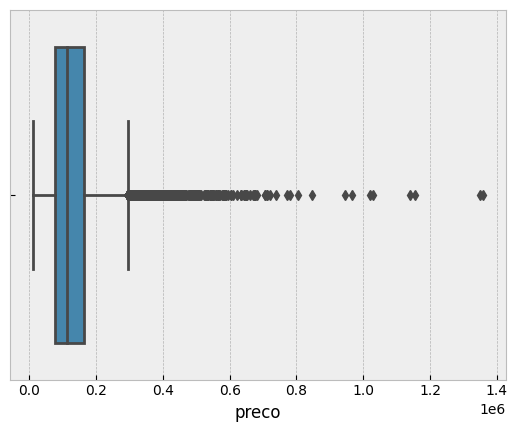

In [121]:
#olhando as outlier e decidindo não tratar
sns.boxplot(x='preco', data=df, orient='h')

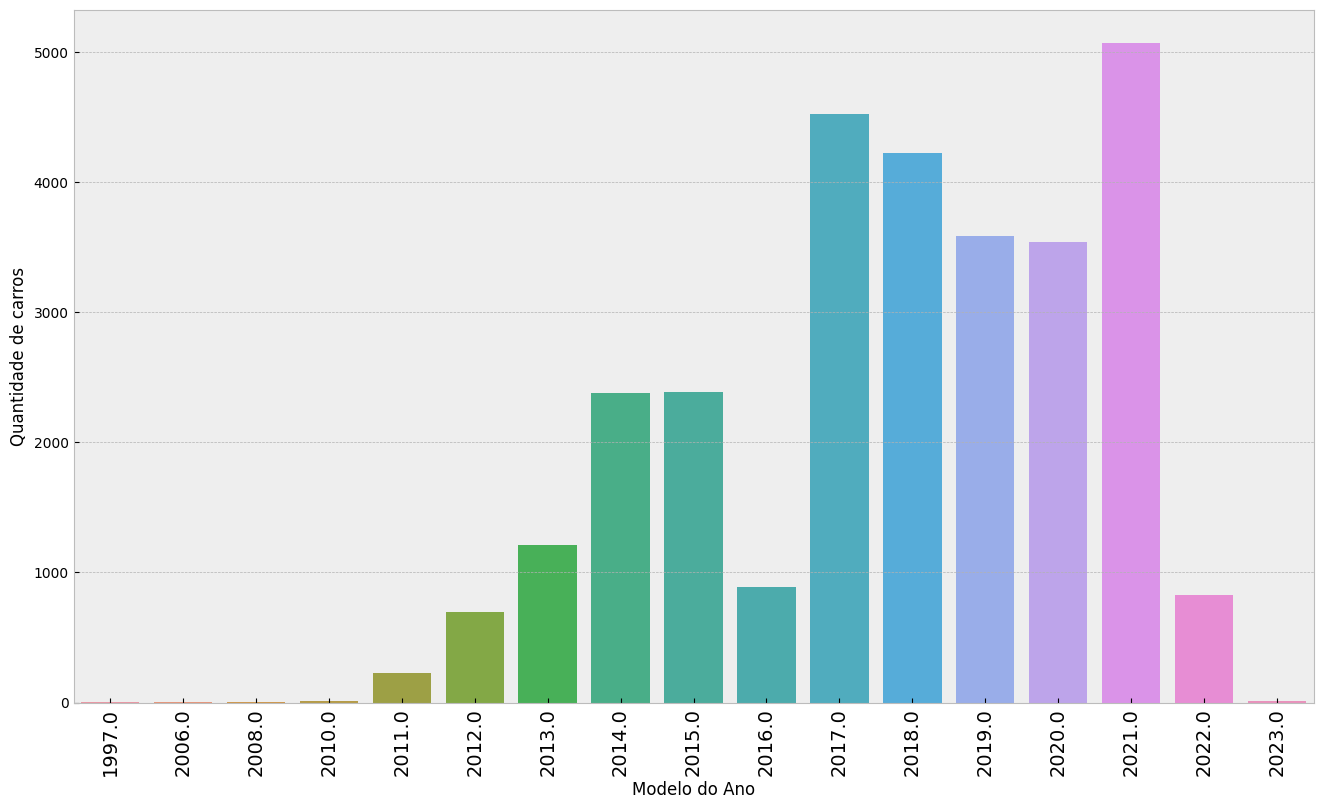

In [122]:
from re import X
plt.figure(figsize=(16,9))
sns.countplot(x=df['ano_modelo'])
plt.xlabel("Modelo do Ano")
plt.ylabel("Quantidade de carros")
plt.xticks(rotation=90, fontsize=14)
plt.show()

<ipython-input-123-334fec704937>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['ano_modelo'], y=df['preco'], ax=ax, ci=None)


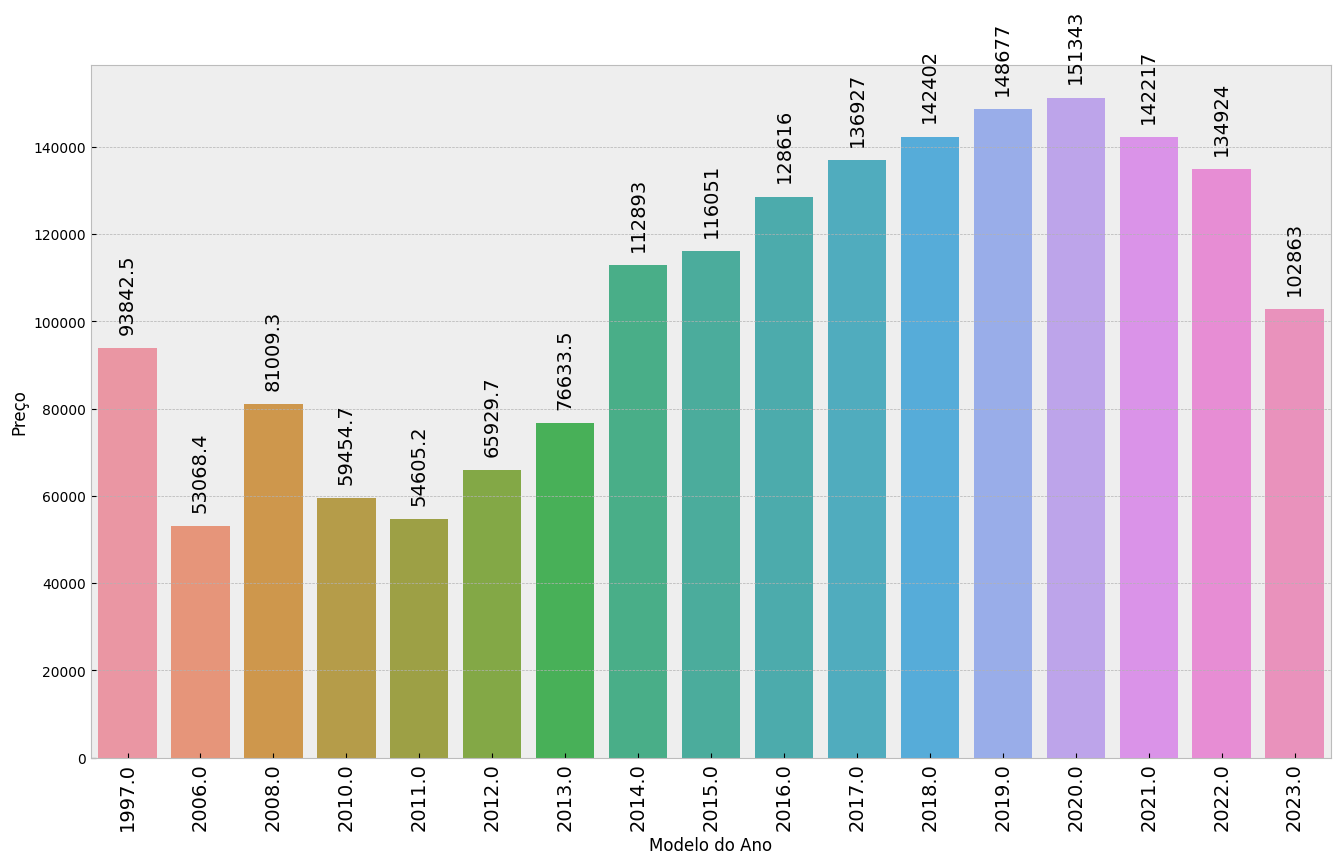

In [123]:
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x=df['ano_modelo'], y=df['preco'], ax=ax, ci=None)
plt.xlabel("Modelo do Ano")
plt.ylabel("Preço")
plt.xticks(rotation=90, fontsize=14)
for cont in ax.containers:
    ax.bar_label(cont, rotation=90, fontsize=14, padding=10)
plt.show()

<ipython-input-124-f57b204d3512>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['ano_modelo'], y=df['hodometro'], ci=None, ax=ax)


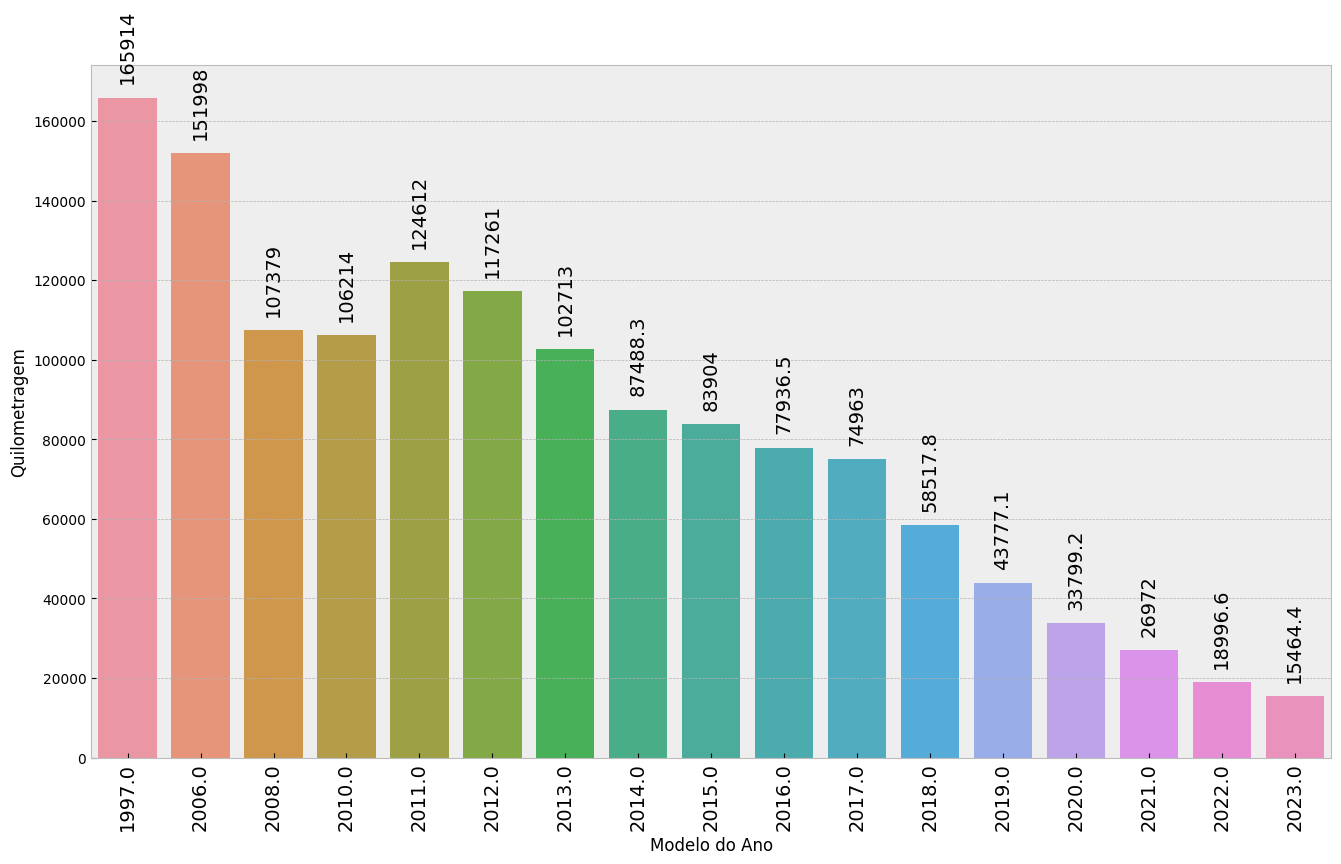

In [124]:
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x=df['ano_modelo'], y=df['hodometro'], ci=None, ax=ax)
plt.xlabel("Modelo do Ano")
plt.ylabel("Quilometragem")
plt.xticks(rotation=90, fontsize=14)
for cont in ax.containers:
    ax.bar_label(cont, rotation=90, fontsize=14, padding=10)
plt.show()

<ipython-input-125-356f1972ce5e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['marca'], y=df['preco'], ci=None,ax=ax)


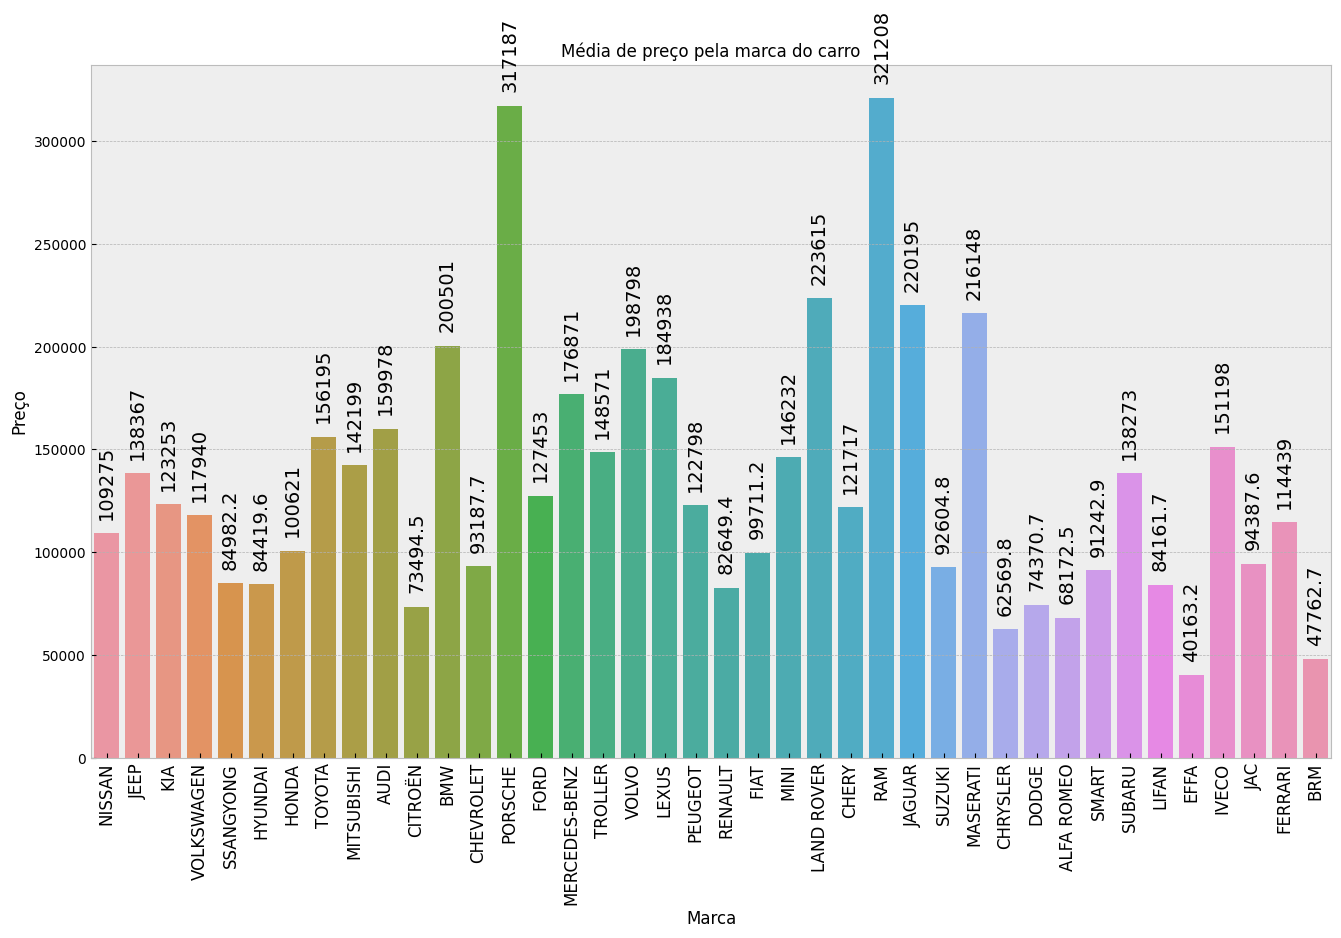

In [125]:
fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(x=df['marca'], y=df['preco'], ci=None,ax=ax)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Marca")
plt.ylabel("Preço")
plt.title('Média de preço pela marca do carro', fontsize=12)
for cont in ax.containers:
    ax.bar_label(cont, rotation=90, fontsize=14, padding=10)
plt.show()

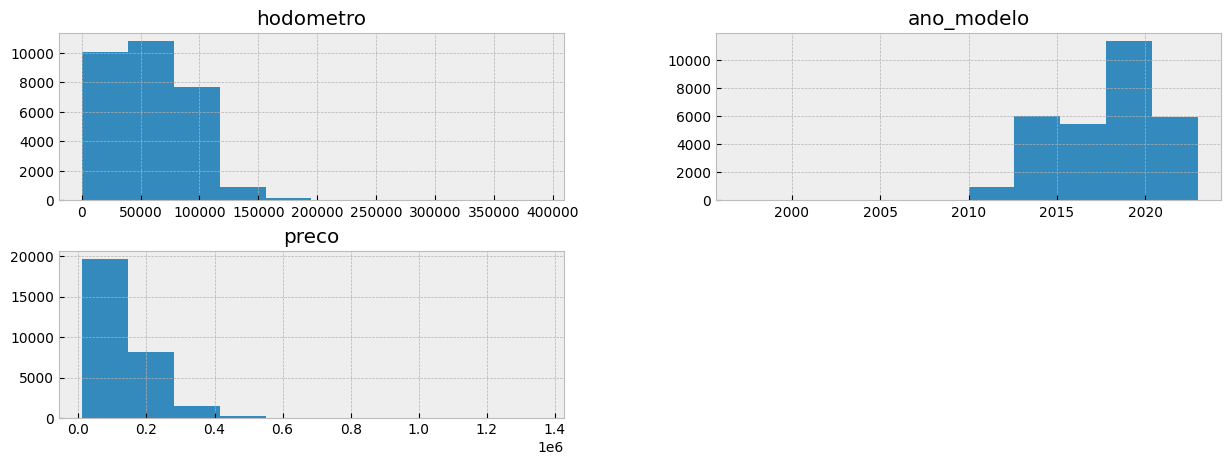

In [126]:
#analisando a correlação entre hodometro, Preço e modelo do ano do carro
colunas_numericas = ['hodometro','ano_modelo','preco']
df.loc[:,colunas_numericas].hist(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='x')
plt.show()

hodometro
ano_modelo
preco


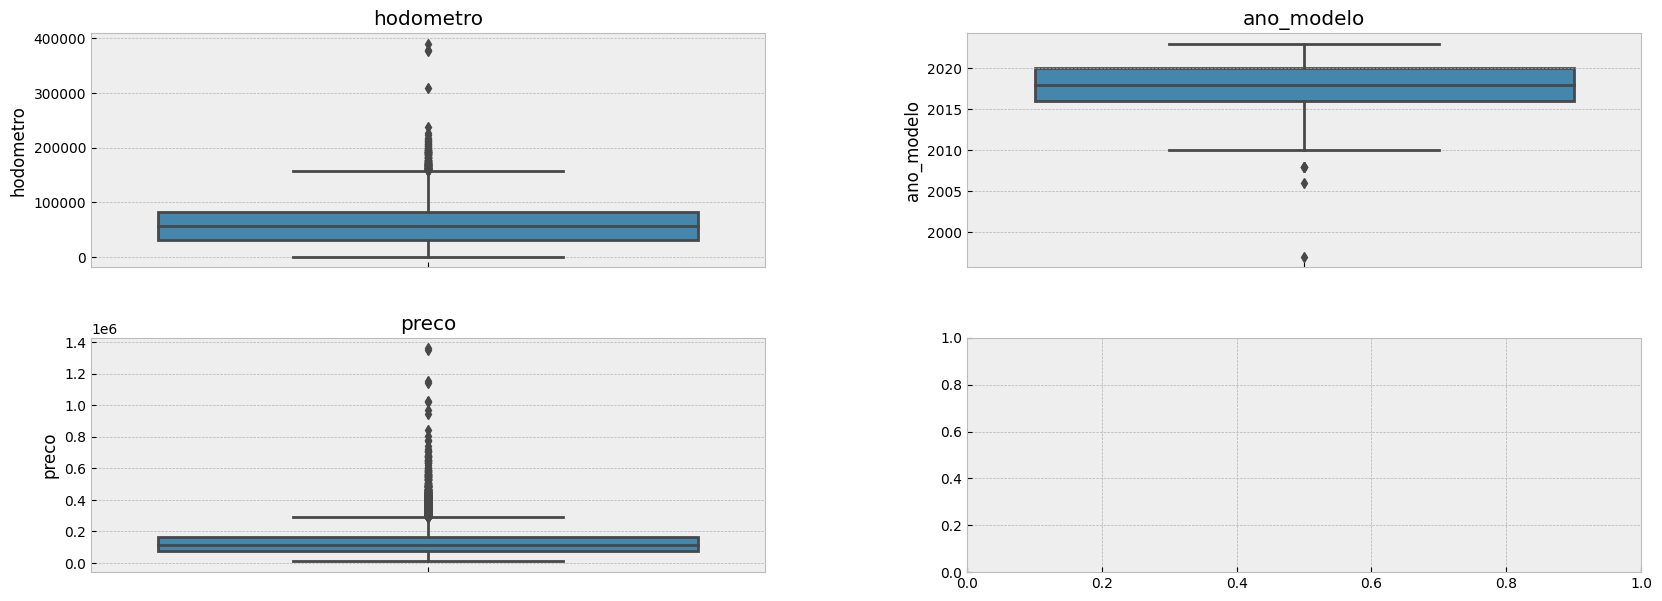

In [127]:
# Analisando a distribuição dos dados com boxplot
fig, axs = plt.subplots(2,2,figsize=(20,7))
fig.subplots_adjust(hspace = .3, wspace=.3)
axs = axs.ravel()

for i in range(len(axs)-1):
  print(colunas_numericas[i])
  sns.boxplot(y=colunas_numericas[i],data=df,
              ax=axs[i], showfliers=True)
  axs[i].set_title(colunas_numericas[i])
plt.show()



# RESPONDENDO A 3 HIPÓTESES DE NEGÓCIO


## Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

In [128]:
carros_volks = df[df['marca'] == 'VOLKSWAGEN']
dummies_volks = pd.get_dummies(carros_volks[['veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','cambio']],prefix='',prefix_sep='')
carros_volks_final = pd.concat([carros_volks[['num_fotos','ano_modelo','hodometro','num_portas','preco']],
                                dummies_volks],axis=1)
carros_volks_final.describe()

,num_fotos,ano_modelo,hodometro,num_portas,preco,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Automatizada,Automatizada DCT,Automática,Automática Sequencial,CVT,Manual,Semi-automática
count,4582.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00,4594.00
mean,10.39,2017.88,58898.02,3.95,117940.09,0.33,0.29,0.69,0.56,0.01,0.00,0.80,0.00,0.00,0.19,0.00
std,3.52,2.59,32248.40,0.32,64307.66,0.47,0.45,0.46,0.50,0.09,0.04,0.40,0.03,0.05,0.39,0.06
min,8.00,1997.00,100.00,2.00,9869.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8.00,2016.00,30905.75,4.00,73037.61,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,8.00,2018.00,57676.00,4.00,103350.09,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,14.00,2020.00,82816.75,4.00,147078.09,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,20.00,2023.00,222321.00,4.00,771701.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## O melhor estado para vender carro popular é ano até 2017, hodometro até 60mil, 4 portas, preço até 120mil, IPVA pago, Licenciado e automático.

## Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?



In [129]:
picape = df[df['tipo'] == 'Picape']
dummies_picape = pd.get_dummies(picape[['veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','cambio']],prefix='',prefix_sep='')
picape_final = pd.concat([picape[['num_fotos','ano_modelo','hodometro','num_portas','preco']],
                                dummies_picape],axis=1)
picape_final.describe()

,num_fotos,ano_modelo,hodometro,num_portas,preco,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Automatizada,Automatizada DCT,Automática,CVT,Manual,Semi-automática
count,4836.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00
mean,10.43,2017.79,60735.02,3.64,158906.21,0.34,0.29,0.64,0.50,0.00,0.00,0.68,0.01,0.31,0.00
std,3.55,2.66,37697.92,0.77,101431.04,0.47,0.46,0.48,0.50,0.05,0.05,0.47,0.08,0.46,0.04
min,8.00,1997.00,100.00,2.00,13642.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8.00,2016.00,28606.00,4.00,85212.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,8.00,2018.00,62094.00,4.00,139814.57,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,14.00,2020.00,86109.00,4.00,209258.56,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
max,21.00,2023.00,390065.00,4.00,1359812.89,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## O melhor estado para comprar uma picape é ano até 2017, hodometro até 61mil, 4 portas, preço até 160mil, IPVA pago e automático.

## Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [130]:
carro_garantia = df[df['garantia_de_fábrica'] == 'Garantia de fábrica']
dummies_carro_garantia = pd.get_dummies(carro_garantia[['veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','cambio']],prefix='',prefix_sep='')
carro_garantia_final = pd.concat([carro_garantia[['num_fotos','ano_modelo','hodometro','num_portas','preco']],
                                dummies_carro_garantia],axis=1)
carro_garantia_final.describe()

,num_fotos,ano_modelo,hodometro,num_portas,preco,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Automatizada,Automatizada DCT,Automática,CVT,Manual
count,4335.00,4365.00,4365.00,4365.00,4365.00,4365.00,4365.00,4365.00,4365.00,4365.00,4365.00,4365.00,4365.00,4365.00
mean,8.60,2020.29,22404.08,3.96,168993.14,0.95,0.77,0.87,0.74,0.01,0.01,0.76,0.14,0.09
std,2.25,1.28,13767.30,0.27,84465.96,0.21,0.42,0.33,0.44,0.08,0.07,0.43,0.35,0.29
min,8.00,2012.00,100.00,2.00,29328.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8.00,2020.00,13006.00,4.00,104700.87,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,8.00,2021.00,21264.00,4.00,148528.91,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
75%,8.00,2021.00,29478.00,4.00,220047.63,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
max,21.00,2023.00,140286.00,4.00,677129.12,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## O melhor estado para comprar um carro dentro da garantia de fabrica é ano até 2020, hodometro até 23mil, 4 portas, preço até 170mil, único dono, Todas as revisões feitas pela concessionária, IPVA pago, Licenciado e automático.

# Criando e respondendo 3 hipóteses de negócio.

# Quais as marcas que mais vendem carros na base de dados?

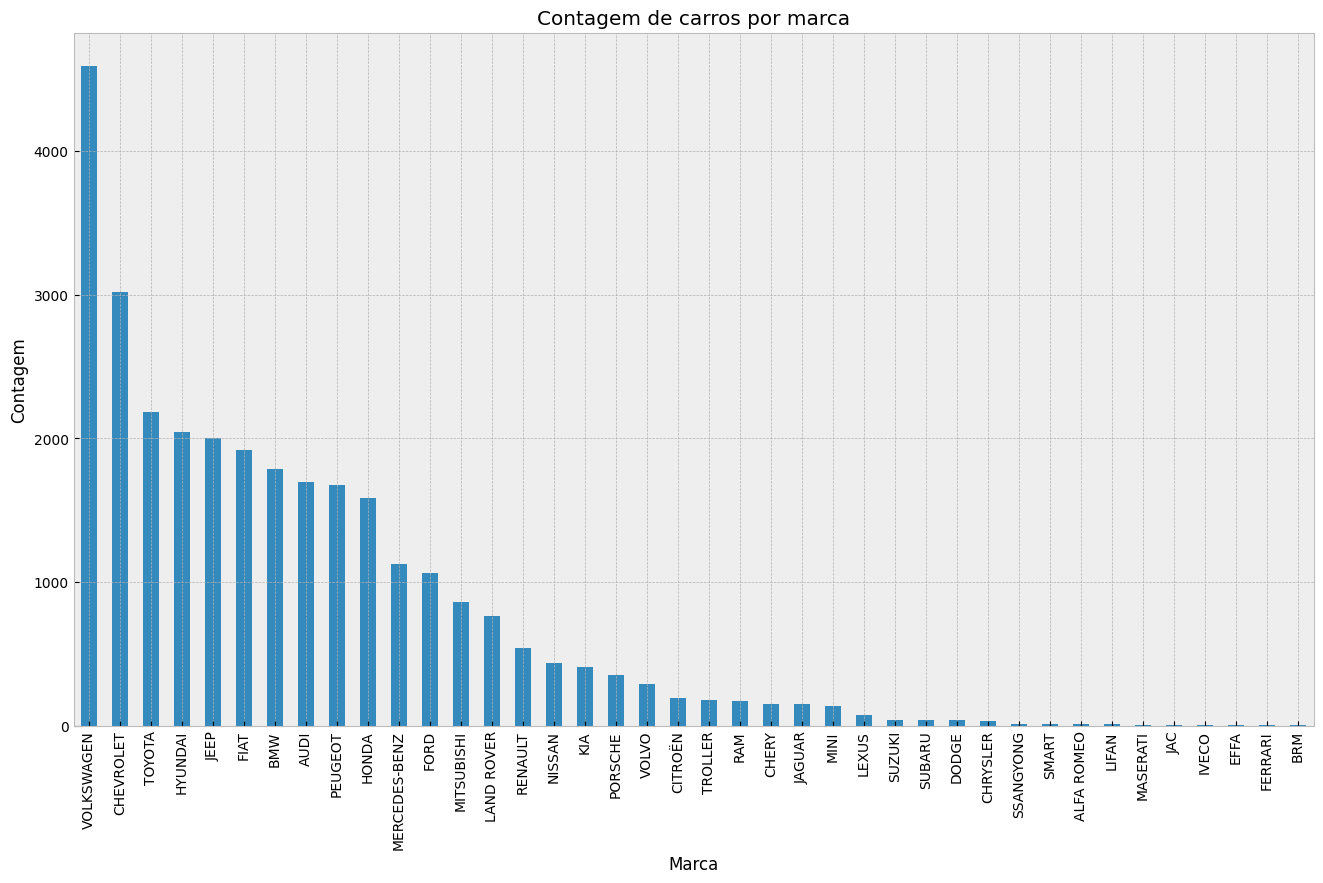

In [131]:
fig, ax = plt.subplots(figsize=(16,9))
contagem_marca = df['marca'].value_counts()
contagem_marca.plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Contagem')
plt.title('Contagem de carros por marca')
plt.show()

## Podemos ver que as marcas que mais vendem são a Volkswagem, Chevrolet e Toyota, sendo as marcas com veicúlos mais populares.

## Qual a média de valor por tipo de carro?

<ipython-input-132-a4ad0108fb9e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['tipo'], y=df['preco'], ci=None,ax=ax)


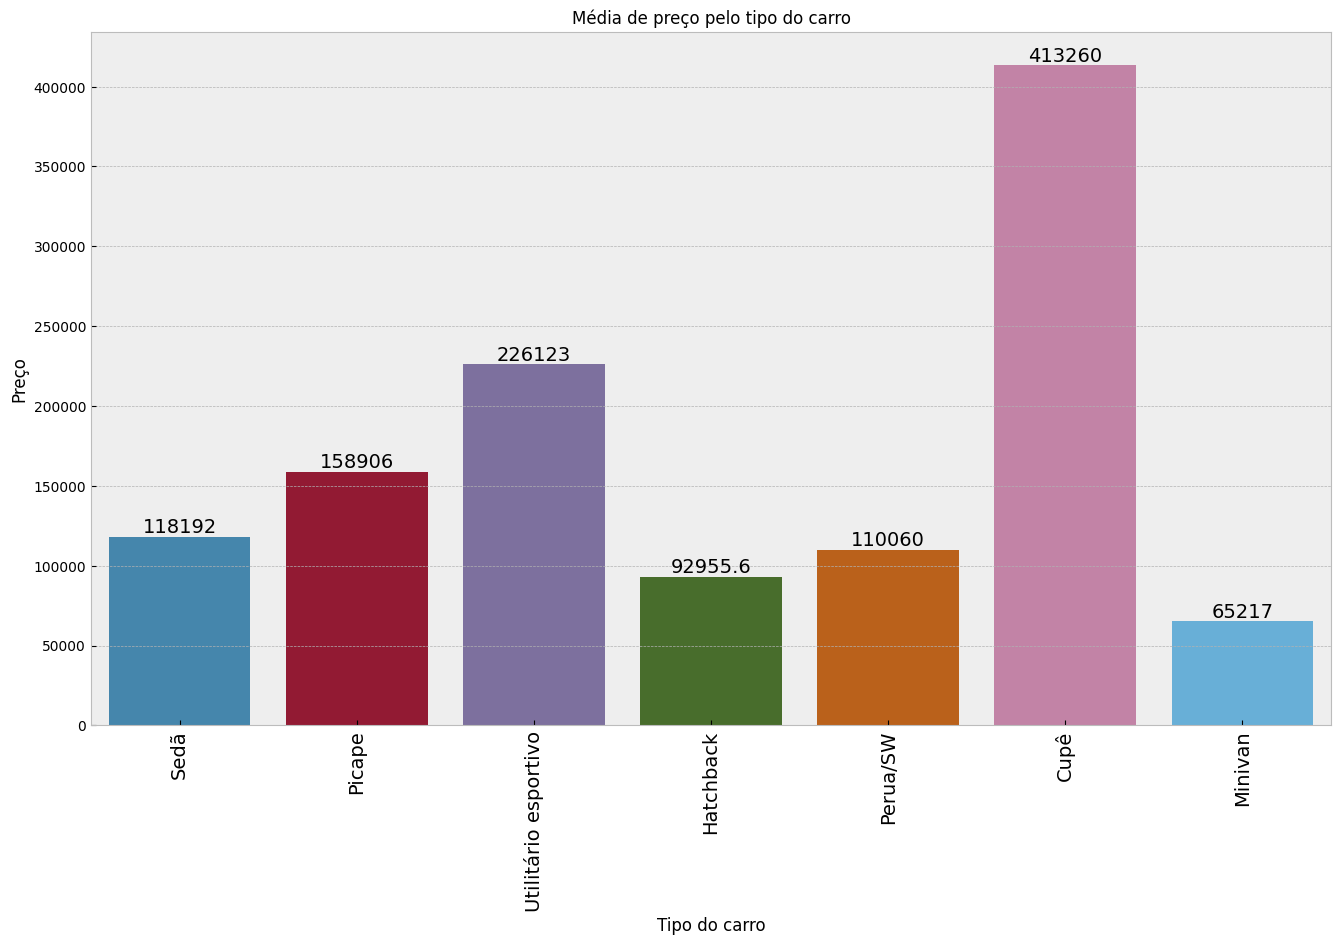

In [132]:
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x=df['tipo'], y=df['preco'], ci=None,ax=ax)
plt.xlabel("Tipo do carro")
plt.ylabel("Preço")
plt.title('Média de preço pelo tipo do carro', fontsize=12)
plt.xticks(rotation=90, fontsize=14)
for cont in ax.containers:
    ax.bar_label(cont,fontsize=14)
plt.show()

## Qual o melhor estado para comprar carro manual?

In [133]:
carro_manual = df[df['cambio'] == 'Manual']
dummies_carro_manual = pd.get_dummies(carro_manual[['veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','cambio']],prefix='',prefix_sep='')
carro_manual_final = pd.concat([carro_manual[['num_fotos','ano_modelo','hodometro','num_portas','preco']],
                                dummies_carro_manual],axis=1)
carro_manual_final.describe()

,num_fotos,ano_modelo,hodometro,num_portas,preco,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Manual
count,4931.00,4989.00,4989.00,4989.00,4989.00,4989.00,4989.00,4989.00,4989.00,4989.00
mean,10.82,2017.83,67639.63,3.83,80713.06,0.36,0.15,0.66,0.55,1.00
std,3.61,2.94,35318.60,0.55,48535.58,0.48,0.36,0.47,0.50,0.00
min,8.00,1997.00,100.00,2.00,9869.95,0.00,0.00,0.00,0.00,1.00
25%,8.00,2016.00,41821.00,4.00,50396.42,0.00,0.00,0.00,0.00,1.00
50%,8.00,2018.00,67369.00,4.00,66962.04,0.00,0.00,1.00,1.00,1.00
75%,15.00,2021.00,87718.00,4.00,100577.59,1.00,0.00,1.00,1.00,1.00
max,20.00,2023.00,390065.00,4.00,1140112.65,1.00,1.00,1.00,1.00,1.00


## O melhor estado para comprar um carro manual é ano até 2017, hodometro até 68mil, 4 portas, preço até 81mil, IPVA pago, Licenciado.




# Modelando os dataset.

In [134]:
#passando preço, hodometro e ano_modelo para log
df.loc[:,'preco_log'] = np.log(df.preco)
df.loc[:,'hodometro_log']  = np.log(df.hodometro)
df.loc[:,'ano_modelo_log'] = np.log(df.ano_modelo)

In [135]:
## Transformando as variaveis do tipo string em dummies
dummies_ = pd.get_dummies(df[['veiculo_único_dono','revisoes_concessionaria','ipva_pago','tipo','veiculo_licenciado','cambio','marca']],prefix='',prefix_sep='')
dummies_

,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Cupê,Hatchback,Minivan,Perua/SW,Picape,Sedã,Utilitário esportivo,...,RAM,RENAULT,SMART,SSANGYONG,SUBARU,SUZUKI,TOYOTA,TROLLER,VOLKSWAGEN,VOLVO
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
29580,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29581,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
29582,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# Concatenando os dados e colocando na base final
df_final = pd.concat([df[['num_fotos','ano_modelo','hodometro','num_portas','preco','preco_log','hodometro_log','ano_modelo_log']],
                                dummies_],axis=1)
df_final = df_final.fillna(0)

In [137]:
#Definindo a base treino e teste.
df_train_x = df_final.drop(columns=['preco','preco_log','hodometro_log','ano_modelo_log'])
df_train_y = df_final['preco']
df_train_x_log = df_final.drop(columns=['preco','preco_log'])
df_train_y_log = df_final['preco_log']

In [138]:
#Separando o treino e teste para achar o melhor modelo
x_treino, x_teste,y_treino,y_teste = train_test_split(df_train_x,df_train_y,test_size=.2,random_state=1234)
x_treino_log, x_teste_log,y_treino_log,y_teste_log = train_test_split(df_train_x_log,df_train_y_log,test_size=.2,random_state=1234)

In [139]:
resultados = []
# Modelo com dados valores absolutos
dtr = DecisionTreeRegressor()
dtr.fit(x_treino,y_treino)
resultados.append( ('dtr', dtr.score(x_teste,y_teste)) )

# Modelo com dados valores normalizados com log
dtr_log = DecisionTreeRegressor()
dtr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('dtr_log', dtr_log.score(x_teste_log,y_teste_log)) )


In [140]:
# Modelo com dados valores absolutos
rfr = RandomForestRegressor()
rfr.fit(x_treino,y_treino)
resultados.append( ('rfr', rfr.score(x_teste,y_teste)) )

# Modelo com dados valores normalizados com log
rfr_log = RandomForestRegressor()
rfr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('rfr_log', rfr_log.score(x_teste_log,y_teste_log)) )

0.2850023810468917 0.6224761875220108


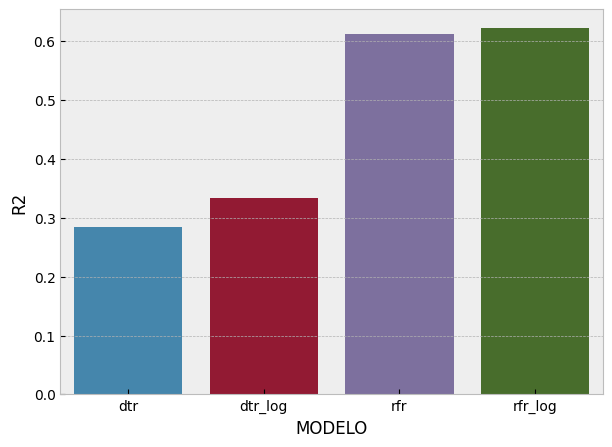

In [141]:
## Gerando dataframe com a lista dos resultados (R²)
plt.figure(figsize=(7,5))

df_resultados = pd.DataFrame(resultados,columns=['MODELO','R2'])
print(df_resultados.R2.min(), df_resultados.R2.max())
sns.barplot(x='MODELO',y='R2',data = df_resultados.sort_values('R2'))
plt.show()

In [142]:
#retirando do dataframe o tipo Conversivel pois não havia dado no meu treino
df_test = df_test[~df_test['tipo'].str.contains('Conversível')]
df_test = df_test[~df_test['marca'].str.contains('LAMBORGHINI')]
df = df[~df['marca'].str.contains('BRM')]
df = df[~df['marca'].str.contains('IVECO')]

In [143]:
#Preparando os dados de teste que vou fazer a previsão
## Transformando as variaveis do tipo string em dummies
dummies_ = pd.get_dummies(df[['veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','tipo','cambio','marca']],prefix='',prefix_sep='')
dummies_

# Concatenando os dados e colocando na base final
df_final = pd.concat([df[['num_fotos','num_portas','preco','preco_log','hodometro_log','ano_modelo_log']],
                                dummies_],axis=1)
df_final = df_final.fillna(0)
df_final = df_final.reindex(sorted(df_final.columns), axis = 1)


df_test.loc[:,'hodometro_log']  = np.log(df_test.hodometro)
df_test.loc[:,'ano_modelo_log'] = np.log(df_test.ano_modelo)
dummies_test = pd.get_dummies(df_test[['veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','tipo','cambio','marca']],prefix='',prefix_sep='')
df_final_test = pd.concat([df_test[['num_fotos','num_portas','hodometro_log','ano_modelo_log']],
                                dummies_test],axis=1)
df_final_test = df_final_test.fillna(0)
df_final_test = df_final_test.reindex(sorted(df_final_test.columns), axis = 1)

In [144]:
df_train_x_log = df_final.drop(columns=['preco','preco_log'])
df_train_y_log = df_final['preco_log']

In [145]:
# Modelo com dados valores normalizados com log
rfr_log = RandomForestRegressor()
rfr_log.fit(df_train_x_log,df_train_y_log)
pred = rfr_log.predict(df_final_test)
pred_original_scale = np.exp(pred)

In [146]:
df_test_final = df_test[['id']].copy()
df_test_final['preco'] = pred_original_scale

In [147]:
df_test_final.to_csv('predicted.csv', index=False)

## Eu vou fazer a previsão de preços com uma regressão do tipo arvore, ela vai escolhendo as variaveis de como galhos de arvores, utilizei em minhas transformações os valores preço, hodometro e ano para log para que houvesse mais normalizados. O modelo que mais se aproximou dos dados foi o RandomForestRegressor que chegou a um acerto maior que 0,6 no R2.